<a href="https://colab.research.google.com/github/Giusgarus/ISPR-assignment/blob/main/First/Assignment_4_Giuseppe_Gabriele_Russo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4, Giuseppe Gabriele Russo 583744

Implement the convolution of a set of edge detection filters with an image and apply it to at three images of your choice from the dataset. Implement Roberts, Prewitt and Sobel filters (see here, Section 5.2, for a reference) and compare the results (it is sufficient to do it visually).  You should not use the library functions for performing the convolution or to generate the Sobel filter. Implement your own and show the code!

## Import

In [ ]:
# Install necessary packages using pip
%pip install matplotlib
%pip install kagglehub
%pip install numpy

In [ ]:
# Import Required Libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import kagglehub
import numpy as np

## Dataset download

In [ ]:
# Download the latest version of the dataset using kagglehub
path = kagglehub.dataset_download("ztaihong/weizmann-horse-database")

# Define the directory where the images are stored
dir = os.path.join(path, 'weizmann_horse_db', 'horse')

# List all files in the directory
list = os.listdir(dir)

# Select three specific images chosen
choosen_foto = [os.path.join(dir, "horse006.png"), os.path.join(dir, "horse104.png"), os.path.join(dir, "horse301.png")]

# Display the number of images found in the dataset
print(f"Found {len(choosen_foto)} images in the dataset.")

100%|██████████| 113M/113M [00:01<00:00, 63.9MB/s]

Extracting files...


Found 3 images in the dataset.


## Display Sample Images

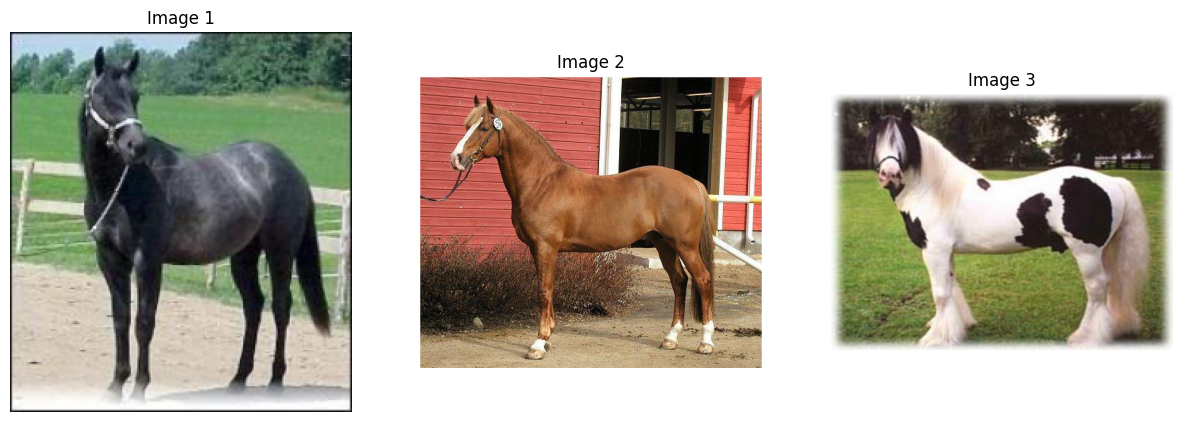

In [ ]:
# Display Sample Images
num_samples = 3  # Number of sample images to display

# Ensure we don't try to display more images than we have
num_samples = min(num_samples, len(choosen_foto))

# Plot sample images
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    try:
        # Read the image from the chosen file path
        img = mpimg.imread(choosen_foto[i])

        # Create a subplot for each image
        plt.subplot(1, num_samples, i + 1)

        # Display the image
        plt.imshow(img)

        # Set the title of the subplot
        plt.title(f"Image {i + 1}")

        # Remove the axis for a cleaner look
        plt.axis('off')
    except FileNotFoundError:
        # Handle the case where the image file is not found
        print(f"File not found: {choosen_foto[i]}")

# Show the plot with all the sample images
plt.show()

## Filter definition

### Definition of Edge Detection Operators

Manually definition of the edge detection filters. We implement functions to create the kernels for the Roberts, Prewitt, and Sobel operators, as well as a function to create a Gaussian kernel. These kernels will be used to perform convolution with the images in the edge detection process.

In [ ]:
# Define edge detection filters manually

# Function to create Roberts operator kernels
def robert():
    # Define the Roberts operator for the x direction
    roberts_x = np.array([[1, 0], [0, -1]])
    # Define the Roberts operator for the y direction
    roberts_y = np.array([[0, 1], [-1, 0]])
    # Return both kernels as a tuple
    return roberts_x, roberts_y

# Function to create Prewitt operator kernels
def prewitt():
    # Define the Prewitt operator for the x direction
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    # Define the Prewitt operator for the y direction
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    # Return both kernels as a tuple
    return prewitt_x, prewitt_y

# Function to create Sobel operator kernels
def sobel():
    # Define the Sobel operator for the x direction
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    # Define the Sobel operator for the y direction
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    # Return both kernels as a tuple
    return sobel_x, sobel_y

# Function to create a Gaussian kernel
def gaussian(size, sigma):
    # Calculate the offset for the center of the kernel
    k = size // 2
    # Create a meshgrid of coordinates
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))

    # Calculate the Gaussian function
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    # Normalize the kernel so that the sum of all elements is 1
    kernel /= kernel.sum()

    # Return the Gaussian kernel
    return kernel

## Convolution function

The convolution function takes an image and a kernel as inputs and performs convolution to produce an output image.

### Steps of the Convolution Function:

1. **Input Parameters**:
    - `image`: A 2D numpy array representing the grayscale image.
    - `kernel`: A 2D numpy array representing the filter to be applied.

2. **Image and Kernel Dimensions**:
    - The function retrieves the height (`h`) and width (`w`) of the input image.
    - It also retrieves the height (`kh`) and width (`kw`) of the kernel.

3. **Padding Calculation**:
    - To ensure the output image has the same dimensions as the input image, the function calculates the necessary padding for the height (`pad_h`) and width (`pad_w`). The padding is half the size of the kernel dimensions.

4. **Image Padding**:
    - The input image is padded with zeros on all sides using the `np.pad` function. This step ensures that the kernel can be applied to the border pixels of the image.

5. **Output Initialization**:
    - An output array of the same shape as the input image is initialized with zeros. This array will store the result of the convolution.

6. **Convolution Operation**:
    - The function iterates over each pixel in the input image.
    - For each pixel, it extracts the region of the padded image that corresponds to the current position of the kernel.
    - It performs element-wise multiplication between the extracted region and the kernel, and sums the result to obtain the convolution value for the current pixel.
    - The convolution value is stored in the corresponding position of the output array.

7. **Return Output**:
    - The function returns the output array, which contains the result of the convolution operation.

This function allows us to apply various filters to images by defining different kernels, such as edge detection filters (Roberts, Prewitt, Sobel) and Gaussian blurring filters.

In [ ]:
def convolve(image, kernel):
    # Get the height and width of the image
    h, w = image.shape

    # Get the height and width of the kernel
    kh, kw = kernel.shape

    # Calculate the padding needed for the height and width
    pad_h, pad_w = kh // 2, kw // 2

    # Pad the image with zeros on all sides
    # This is done to ensure that the output image has the same dimensions as the input image
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array of the same shape as the input image, initialized to zeros
    output = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(h):
        for j in range(w):
            # Extract the region of the padded image that corresponds to the current position of the kernel
            region = padded_img[i:i+kh, j:j+kw]

            # Perform element-wise multiplication between the region and the kernel, and sum the result
            output[i, j] = np.sum(region * kernel)

    return output

## Normal convolution

In [ ]:
# List to store the filtered images for each filter
filtered_images = {}

# Iterate over the names of the filters and their corresponding kernels
for name, (kx, ky) in zip(["Roberts", "Prewitt", "Sobel"], [robert(), prewitt(), sobel()]):
    # Initialize an empty list to store the filtered images for the current filter
    filtered_images[name] = []

    # Iterate over the chosen images
    for img_path in choosen_foto:
        # Read the image and convert it to grayscale by averaging the color channels
        img = np.mean(mpimg.imread(img_path), axis=2)

        # Apply the x-direction kernel to the image using the convolve function
        gx = convolve(img, kx)

        # Apply the y-direction kernel to the image using the convolve function
        gy = convolve(img, ky)

        # Append the results as a tuple (gx, gy) to the list for the current filter
        filtered_images[name].append((gx, gy))

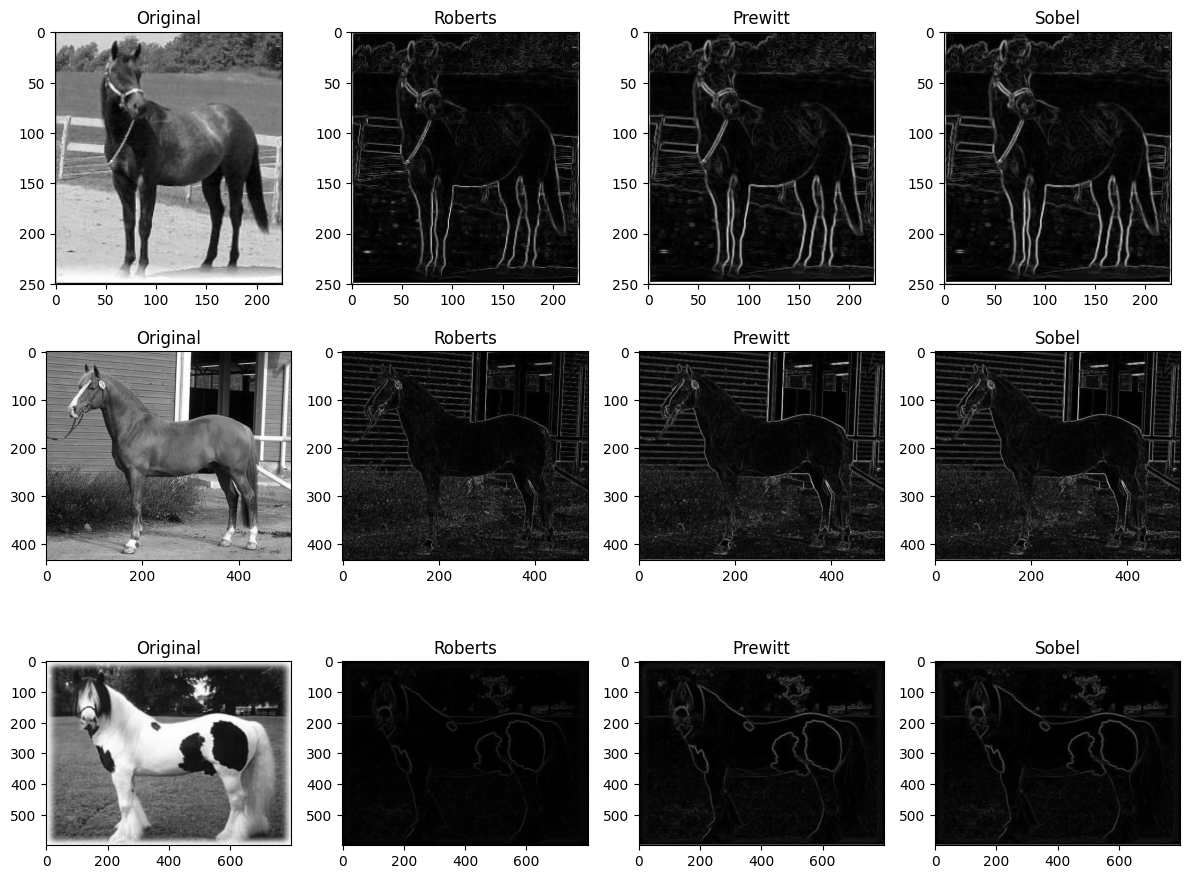

In [ ]:
fig, axes = plt.subplots(len(choosen_foto), 4, figsize=(12, 9))

# Initialize a list to store the gradient magnitudes for each image and filter
all_gradients = [[], [], []]

# Iterate over the chosen images
for i, img_path in enumerate(choosen_foto):
    # Read the image and convert it to grayscale by averaging the color channels
    img = np.mean(mpimg.imread(img_path), axis=2)

    # Display the original image in the first column of the current row
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title("Original")

    # Iterate over the filters and their corresponding gradients
    for j, (name, gradients) in enumerate(filtered_images.items()):
        # Unpack the gradients for the current filter
        gx, gy = zip(*gradients)

        # Calculate the gradient magnitude using the hypotenuse function
        gradient_magnitude = np.hypot(gx[i], gy[i])

        # Append the gradient magnitude to the list for the current image
        all_gradients[i].append(gradient_magnitude)

        # Display the gradient magnitude in the corresponding subplot
        axes[i, j+1].imshow(gradient_magnitude, cmap='gray')
        axes[i, j+1].set_title(name)

# Display the figure with all the subplots
plt.tight_layout()
plt.show()

In the first image, all three edge detection filters—Roberts, Prewitt, and Sobel—produced good results. This is mainly because the contrast between the black horse and the light background is very sharp, making edge detection straightforward.  

For the other two images, however, the performance of the filters varies. The Roberts operator tends to perform worse, capturing fewer details and producing less accurate edges. In contrast, the Prewitt and Sobel filters yield more similar results, detecting edges more effectively and consistently.  

A noticeable issue is that both the background and the grass are frequently identified as edges, even though they should not be. This is likely due to texture variations and gradual intensity changes that the filters interpret as edges.

To refine the results, we will now apply a thresholding technique. This step helps remove weak edges caused by noise and texture variations, keeping only the most significant edges. By setting an appropriate threshold value, we aim to enhance the clarity of detected contours and reduce false edge detections in background regions.  

## Plot with treshold

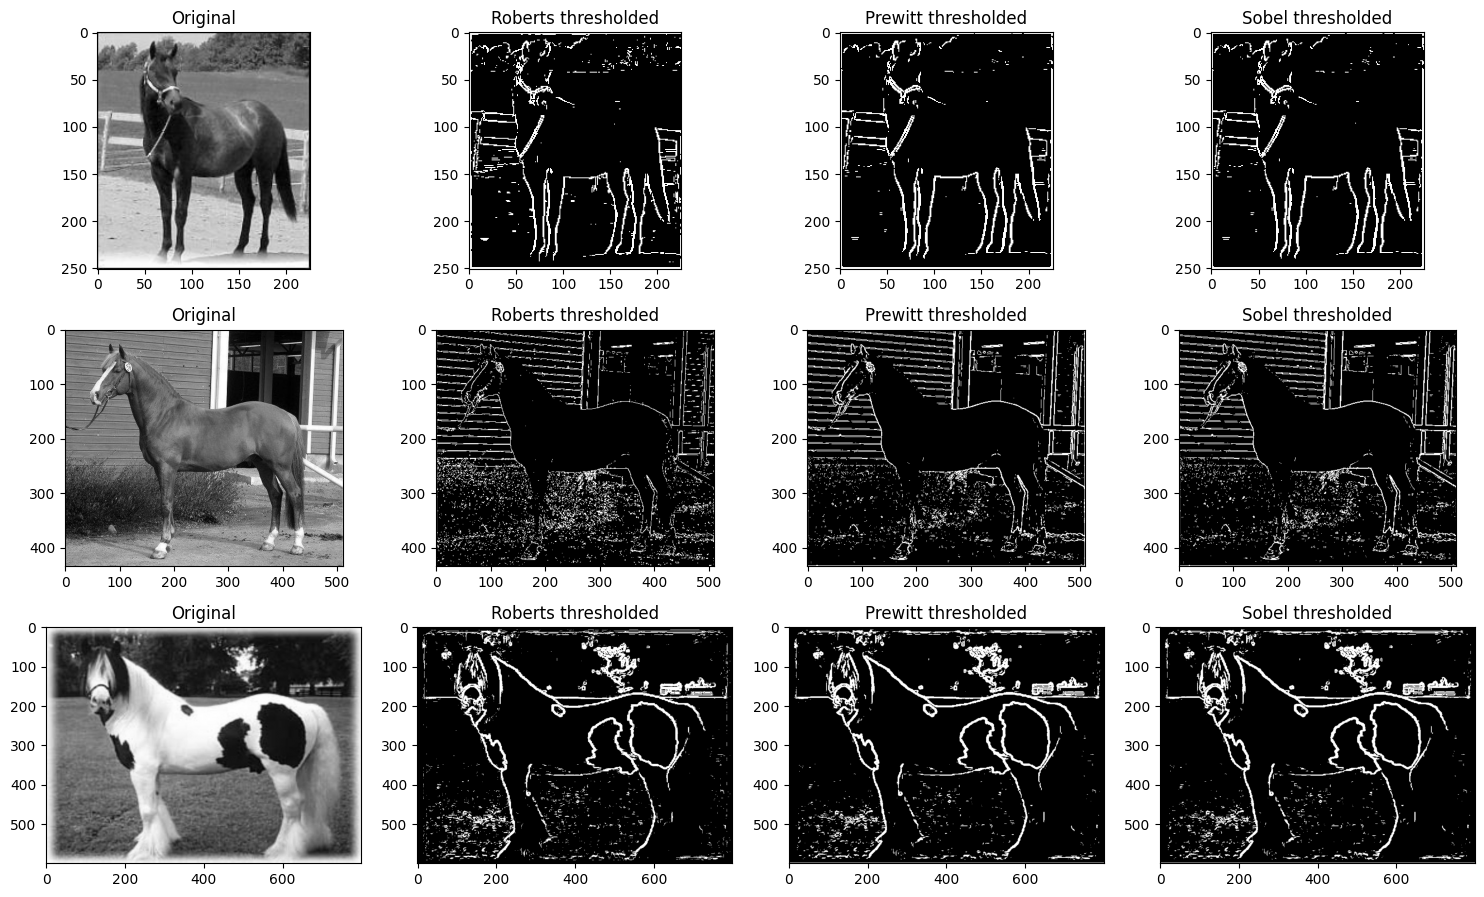

In [ ]:
fig2, axes2 = plt.subplots(len(choosen_foto), 4, figsize=(15, 9))

# Iterate over the chosen images
for i, img_path in enumerate(choosen_foto):
    # Read the image and convert it to grayscale by averaging the color channels
    img = np.mean(mpimg.imread(img_path), axis=2)

    # Display the original image in the first column of the current row
    axes2[i, 0].imshow(img, cmap='gray')
    axes2[i, 0].set_title("Original")

    # Iterate over the filters and their corresponding gradients
    for j, (name, gradients) in enumerate(filtered_images.items()):
        # Apply a threshold to the gradient magnitude image
        # Convert the gradient magnitude to uint8 type and apply a threshold
        #_, thresh = cv2.threshold(all_gradients[i][j].astype(np.uint8), np.percentile(all_gradients[i][j], 60), 255, cv2.THRESH_BINARY)

        # Calculate the threshold as the 90th percentile of the filtered image
        threshold_value = np.percentile(all_gradients[i][j], 90)

        # Apply the threshold: everything greater becomes 255, otherwise 0
        thresh = np.where(all_gradients[i][j] >= threshold_value, 255, 0).astype(np.uint8)

        # Display the thresholded image in the corresponding subplot
        axes2[i, j+1].imshow(thresh, cmap='gray')
        axes2[i, j+1].set_title(name + " thresholded")

plt.tight_layout()
plt.show()

After applying thresholding, we observe that while some weak edges have been removed, the method does not effectively eliminate background noise. Even when using a threshold set at the 90th percentile of gradient magnitudes, many unwanted edges—especially in the background and grassy areas—remain visible. This suggests that simple thresholding is not sufficient to suppress noise while preserving important contours.  

One reason for this limitation is that noise and texture variations can still produce relatively strong gradients, which are retained even at high threshold levels. Additionally, thresholding does not differentiate between true object boundaries and high-frequency details caused by texture.  

To improve results, we will first apply a Gaussian filter before edge detection. This step helps smooth the image, reducing high-frequency noise and suppressing small, insignificant gradients before applying edge detection. By doing so, we aim to enhance the robustness of edge detection and improve the overall quality of the extracted contours.  

## Filters with gaussian filter applied before

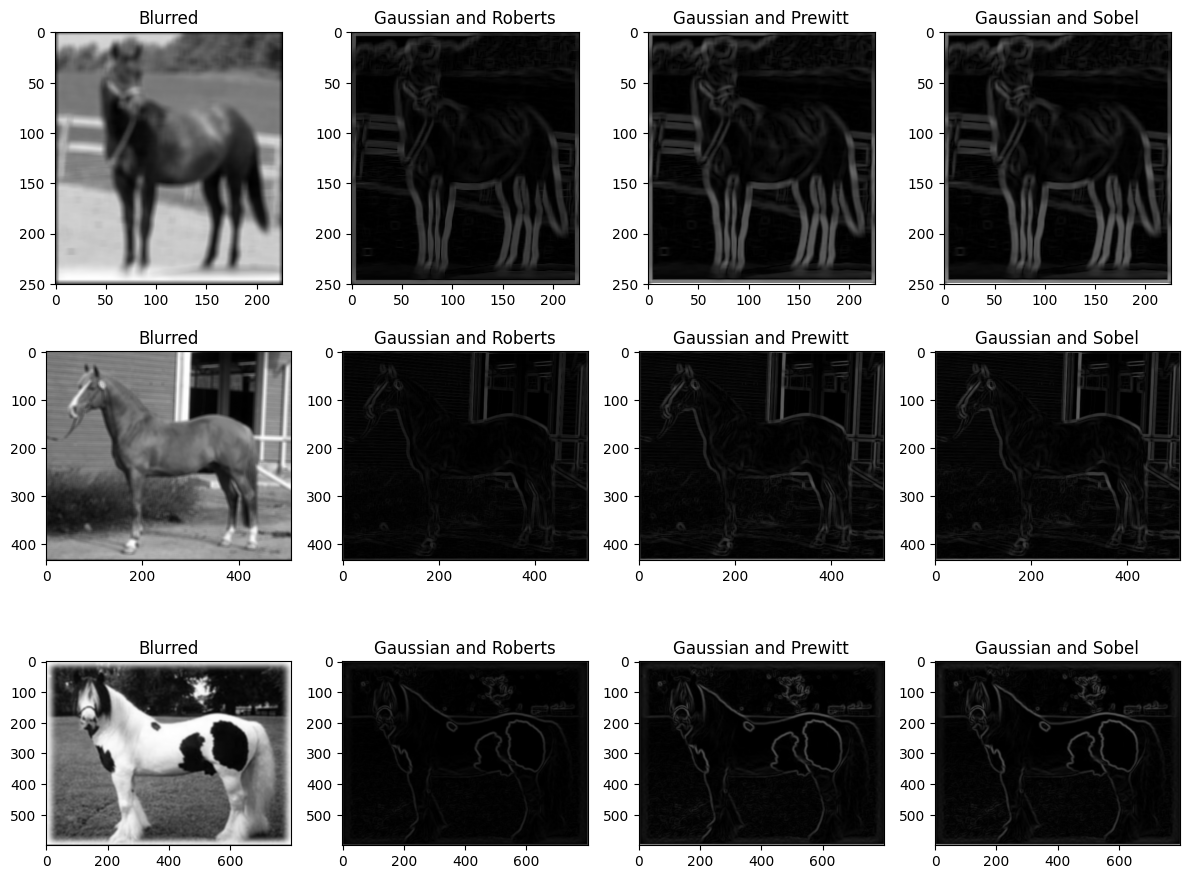

In [ ]:
# Dictionary to store the blurred images
blurred_img = {}

# Apply the Gaussian filter to each chosen image
# The Gaussian filter is used to blur the image, reducing noise and detail
blurred_img = [(convolve(np.mean(mpimg.imread(img), axis=2), gaussian(6, 30)))
               for img in choosen_foto]

# Dictionary to store the filtered images after applying edge detection filters
filtered_images2 = {}

# Iterate over the names of the filters and their corresponding kernels
for name, (kx, ky) in zip(["Roberts", "Prewitt", "Sobel"], [robert(), prewitt(), sobel()]):
    # Apply the edge detection filters to the blurred images
    # Store the results in the dictionary
    filtered_images2[name] = [(convolve(img, kx), convolve(img, ky)) for img in blurred_img]


fig3, axes3 = plt.subplots(len(blurred_img), 4, figsize=(12, 9))

# Iterate over the blurred images
for i, img in enumerate(blurred_img):
    # Display the blurred image in the first column of the current row
    axes3[i, 0].imshow(img, cmap='gray')
    axes3[i, 0].set_title("Blurred")

    # Iterate over the filters and their corresponding gradients
    for j, (name, gradients) in enumerate(filtered_images2.items()):
        # Unpack the gradients for the current filter
        gx, gy = zip(*gradients)

        # Calculate the gradient magnitude using the hypotenuse function
        gradient_magnitude = np.hypot(gx[i], gy[i])

        # Display the gradient magnitude in the corresponding subplot
        axes3[i, j+1].imshow(gradient_magnitude, cmap='gray')
        axes3[i, j+1].set_title("Gaussian and " + name)


plt.tight_layout()
plt.show()

After applying a Gaussian filter before edge detection, we observe a significant improvement in noise reduction, especially in the more complex images. The background and grass, which were previously detected as false edges, are now much less pronounced. This confirms that Gaussian smoothing effectively suppresses high-frequency noise and small texture variations, leading to cleaner edge detection results.  

However, in the first image, where the contrast between the horse and the background was already strong, the Gaussian filter introduces a slight blurring effect. As a result, the detected edges appear less sharp compared to the previous methods. This happens because Gaussian smoothing reduces gradient magnitudes in areas with well-defined edges, making them less distinct.  

Overall, while Gaussian filtering helps reduce noise in complex images, it can also soften edges in cases where strong contrasts are present. This highlights the trade-off between noise reduction and edge sharpness, which must be carefully balanced depending on the application.  

## Considerations

The comparison between the three edge detection operators highlights how the Roberts filter is particularly sensitive to noise. This effect is due to its structure, which uses a very small (2x2) window and computes differences with high responsiveness to details. As a result, images processed with Roberts tend to show artifacts and spurious edges, especially in areas with fine textures or random disturbances.

On the other hand, the Prewitt and Sobel filters provide greater stability. Both use larger windows, making gradient computation less susceptible to local fluctuations. In particular, the Sobel filter, with its weighted approach that gives more importance to central pixels, reduces noise effects and improves the continuity of detected edges. This makes it particularly suitable for images with smoother intensity variations.

### Thresholding:
To isolate the most significant edges and further reduce the effects of illumination changes, a thresholding technique based on the 90th percentile of each individual gradient matrix was applied. Instead of selecting a fixed value for all images, this method dynamically adjusted the threshold according to the specific characteristics of each processed image. But this technique is not enough.

### Gaussian Blurring:
A crucial step in improving the final output was the application of a Gaussian filter before convolution. This preprocessing step significantly reduced background noise, leading to clearer edge detection. A particularly noticeable example can be seen in the second image, where the filter successfully removed the wooden beams of the wall behind the horse, which would have otherwise created false edges. A similar effect can be observed in all the analyzed images, where the variations in lighting on the grass were smoothed out while preserving essential details.


### Conclusion
In conclusion, using Prewitt or Sobel instead of Roberts ensures more stable edge extraction, while the Gaussian filter helps eliminate irrelevant details, allowing for a cleaner and more accurate image analysis. The adaptive percentile-based thresholding further refined the results by automatically adjusting to the image’s gradient distribution, ensuring that only the most significant edges were preserved while minimizing unwanted noise.

### Future Improvements:
1. **Parameter Tuning**: Experiment with different kernel sizes and sigma values for the Gaussian filter.
2. **Advanced Techniques**: Explore more advanced edge detection techniques.
3. **Performance Optimization**: Optimize the convolution function for faster execution, especially for larger images, usign for example FFT.









